# "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\akash\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\akash\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\akash\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('C:/Users/akash/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Insights:

-This dataset contains the details of a customer in telecom services which is both numerical and categorical format.

-Here 'Churn' is target variable which contain 2 categories like 'yes' or 'no'.

-This is binary classification analysis

-We need to predict customer churn rate

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# Exploratary Data Analysis

In [6]:
df.shape

(7043, 21)

This dataset contains 7043 rows and 21 columns. Out of which 1 conlumn is target variable and remaining 20 columns are features variable

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# checking the columns of the dataset

df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are three types of datatypes (int64,float64,object)

In [10]:
# checking the null or missing values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Insights:
    
As we can see there is no null or no missing values are present in our dataset.    

<Axes: >

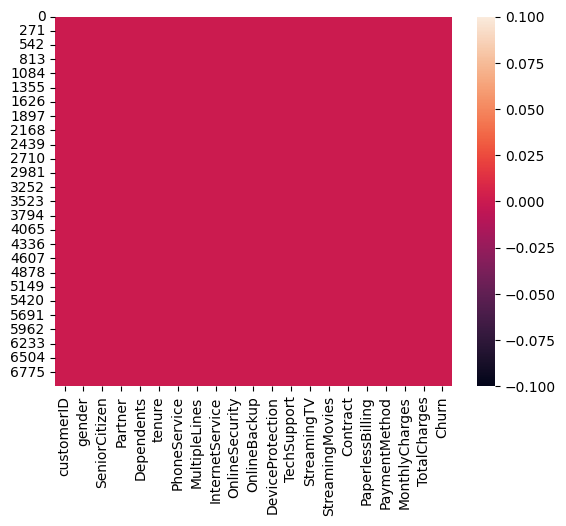

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.nunique().to_frame('No. of unique values')

,No. of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [15]:
df.duplicated().sum()

0

In [16]:
df['TotalCharges'].nunique()

6531

In [17]:
# checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('\n')  

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No inte

-These are the value counts of all columns and to see 11 blank space are present in 'TotalCharges' column in dataset.

-We can notice 'TotalCharges' column has continuous data but it reflect as categorical/object datatypes in analysis. It is showing Because we observe the 11 blank space is present there. Now we handle it.

In [18]:
# now check where the blank space is present in 'TotalCharges' column

df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df['TotalCharges'].value_counts()

TotalCharges
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [20]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

-After we have filled blank space with NaN values in TotalCharges Column.Now 11 null value is present in dataset and we have to handle it either using imputation method or use remove method

-Here we use mean method because the data has continuous values.

In [21]:
#converting object datatype to float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [22]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
# now again we check null value is present or not

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

Now it has been changed and replace null value 

In [26]:
#checking categorical column
categoical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categoical_col.append(i)
print('Categorical columns :',categoical_col) 
print('\n')

#checking numerical column
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print('Numerical columns :', numerical_col)        

Categorical columns : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical columns : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [27]:
df.drop('customerID',axis=1, inplace=True)

In [28]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Here we observe 'No' stands the customer who have not churned and 'Yes' stands the customer who have already churn from the company

In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In the statistical information from above there is no negative value.

From the above description we observe the following :-
 
1)The counts of all the columns are same which means there is no missing values

2)The Mean value is greater than Median(50% percentile) in tenure and TotalCharges which means the data is skewed to right.

3)In the column MonthlyCharges the Mean value is less than Median(50% percentile) which means the data is left skewed.

4)We observe the huge difference between 75% and max value that means outliers present in the dataset.

5)We can also notice the Standard Deviation,min and 25% percentile values from describe method.

# Data Visualization

# Univariate Analysis

Churn
No     5174
Yes    1869
Name: count, dtype: int64

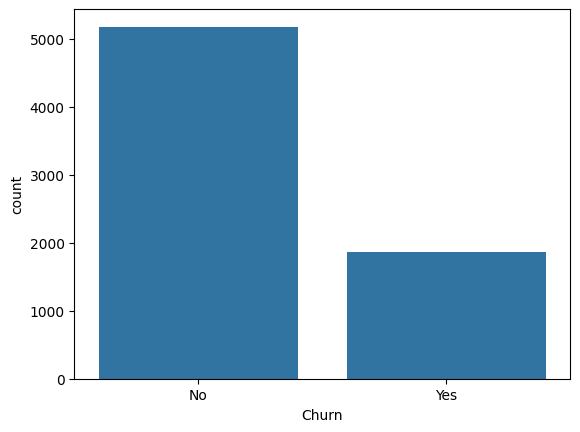

In [30]:
sns.countplot(x='Churn', data=df)
df['Churn'].value_counts()

We can observe that the count of 'No Churn' is high compared to the count of 'Yes Churn' i.e more number of customers who have not churned.

This leads to imbalance dataset.We will rectify using oversampling method.

gender
Male      3555
Female    3488
Name: count, dtype: int64

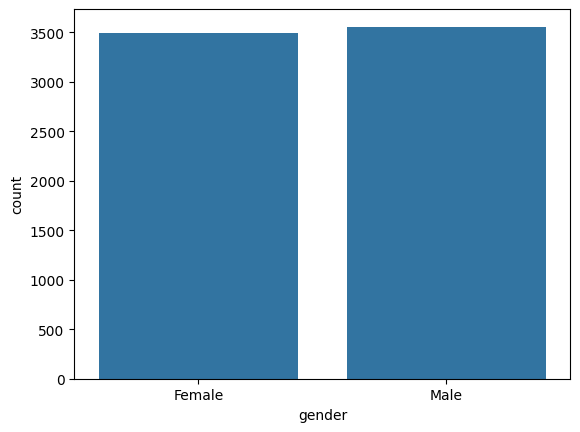

In [31]:
sns.countplot(x='gender', data=df)
df['gender'].value_counts()

we observed that the count of 'gender' column are almost same

Partner
No     3641
Yes    3402
Name: count, dtype: int64

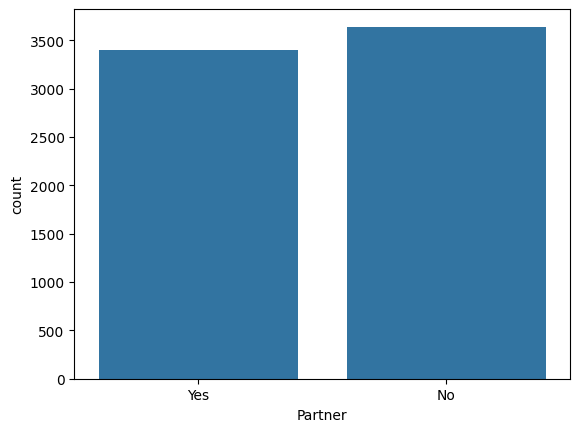

In [32]:
sns.countplot(x='Partner', data=df)
df['Partner'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

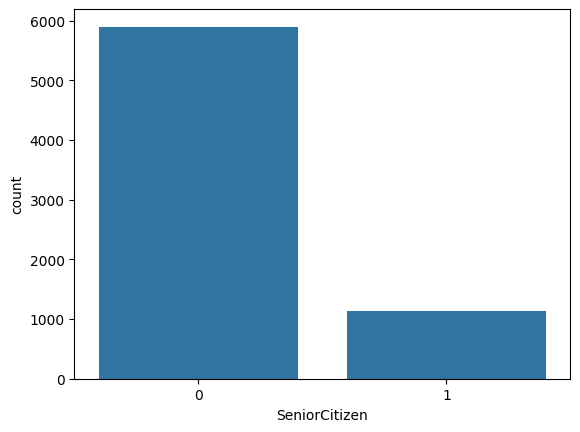

In [33]:
sns.countplot(x='SeniorCitizen', data=df)
df['SeniorCitizen'].value_counts()

<Axes: xlabel='Dependents', ylabel='count'>

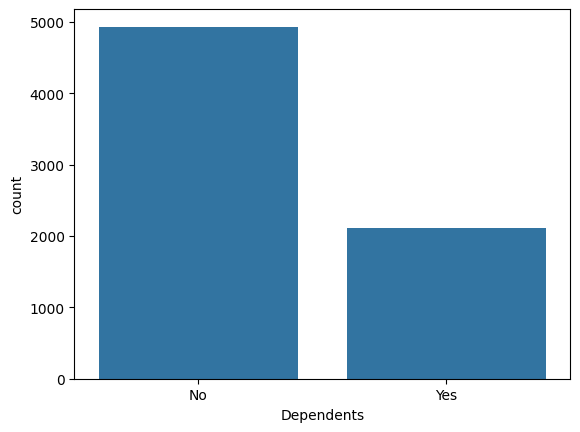

In [34]:
sns.countplot(x='Dependents',data=df)

# Bivariate Analysis

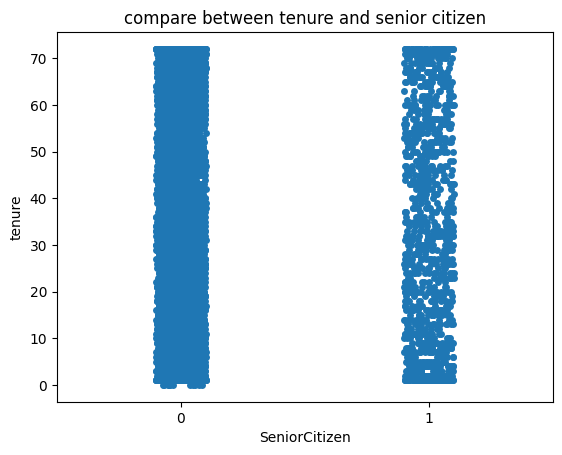

In [35]:
plt.title('compare between tenure and senior citizen')
sns.stripplot(x='SeniorCitizen', y='tenure', data=df)
plt.show()

<Axes: title={'center': 'compare between tenure and totalCharges'}, xlabel='tenure', ylabel='TotalCharges'>

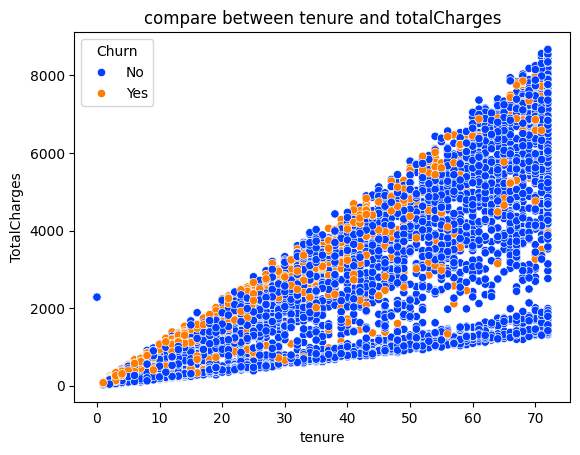

In [36]:
plt.title('compare between tenure and totalCharges')
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df, palette='bright')

here both the columns has strong linear relationship.when totalCharges are increases also tenure is inceases.If customres have low tenure service then there is high chance of churn

<Axes: title={'center': 'compare between gender and totalCharges'}, xlabel='gender', ylabel='TotalCharges'>

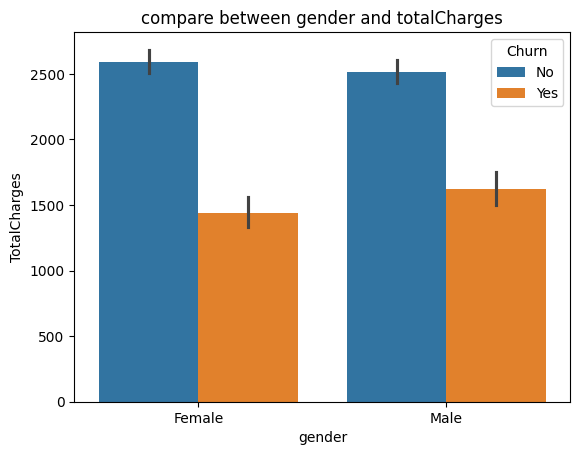

In [37]:
plt.title('compare between gender and totalCharges')
sns.barplot(x='gender', y='TotalCharges', hue='Churn', data=df)

<Axes: title={'center': 'compare between monthlyCharges and totalCharges'}, xlabel='TotalCharges', ylabel='MonthlyCharges'>

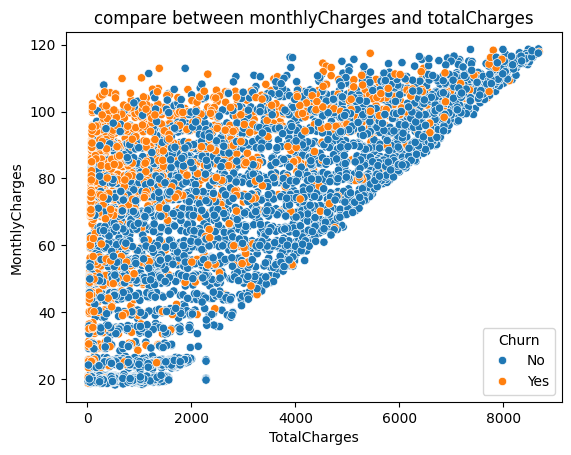

In [38]:
plt.title('compare between monthlyCharges and totalCharges')
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='Churn', data=df)

here we observe both the columns has strong linear relationship.If monthlyCharges are hign and totalCharges is low then there is high chance of churn.

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

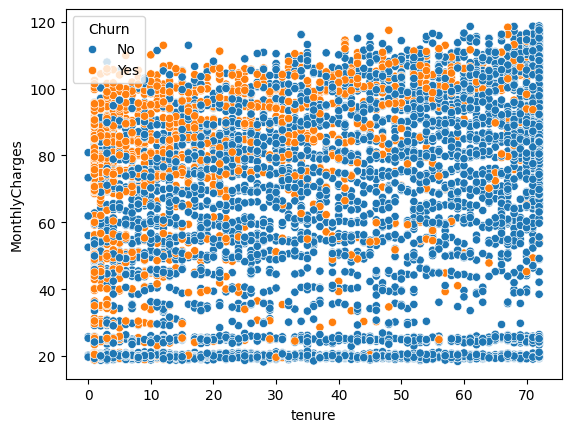

In [39]:
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)

Here we observe if the tenure service is less and monthlyCharges are high then there is high chance of churn 

<Figure size 1000x500 with 0 Axes>

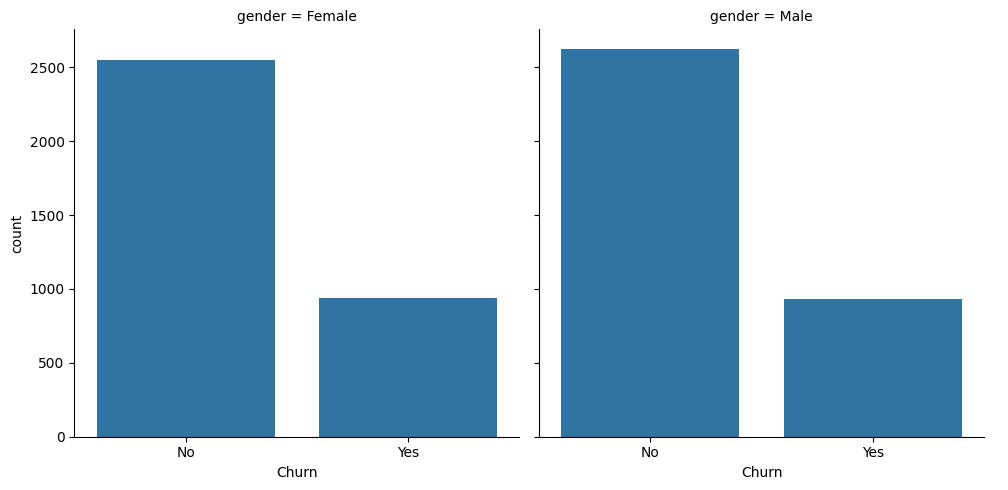

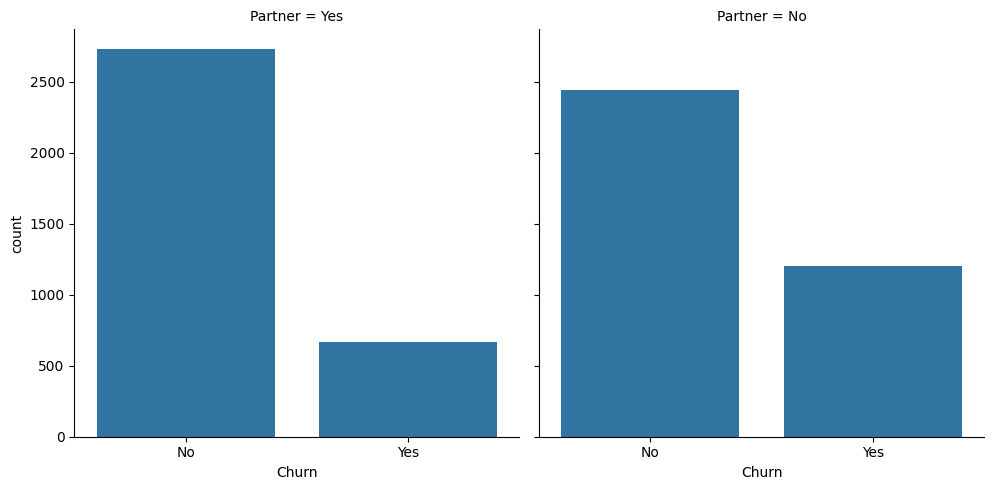

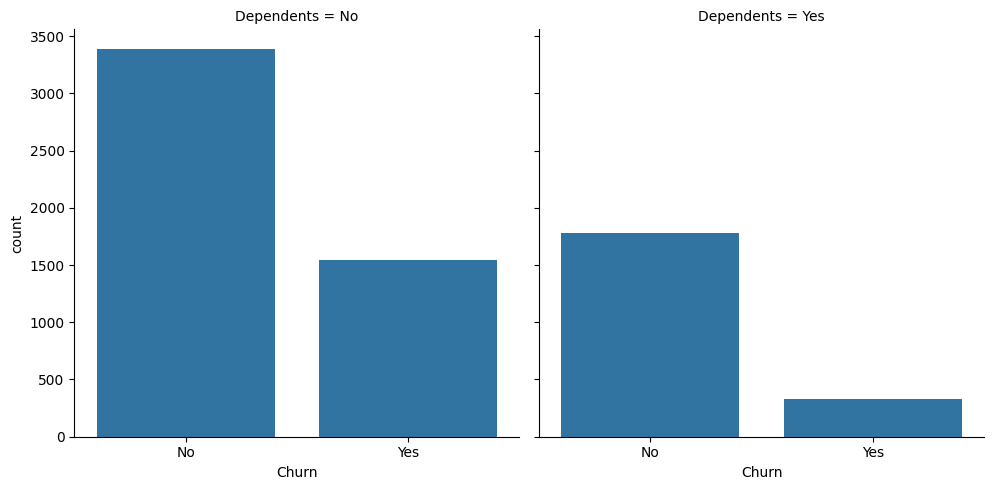

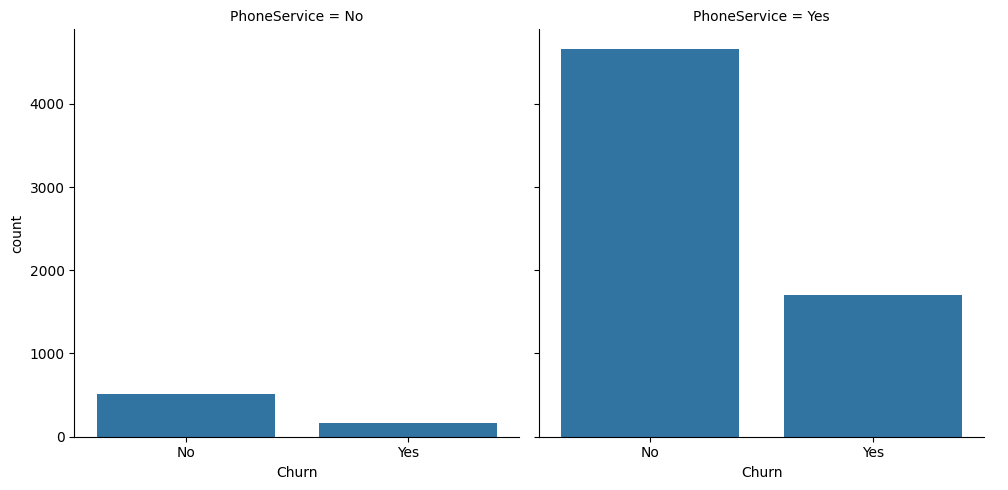

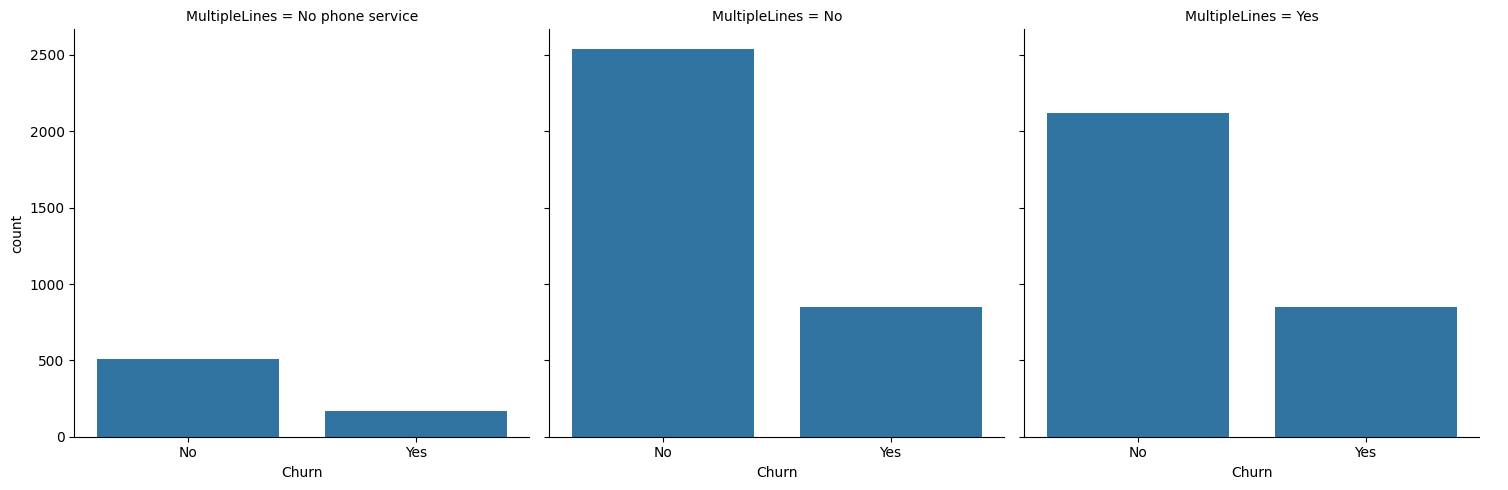

In [40]:
plt.figure(figsize=(10,5))
sns.catplot(x='Churn', col='gender', kind='count', data=df)
sns.catplot(x='Churn', col='Partner', kind='count', data=df)
sns.catplot(x='Churn', col='Dependents', kind='count', data=df)
sns.catplot(x='Churn', col='PhoneService', kind='count', data=df)
sns.catplot(x='Churn', col='MultipleLines', kind='count', data=df)

Here first plot we see, there don't have any significant difference, both genders are equal churn rate.

Here second plot we see, the customers without partner have high churn rate compared to with partner

Here third plot we see,the customers have not any dependency have high churn rate as compared to customers have dependency.

Here fourth plot we see, the customers who have phone services has high churn rate as compared to customers who's don't have phone services.

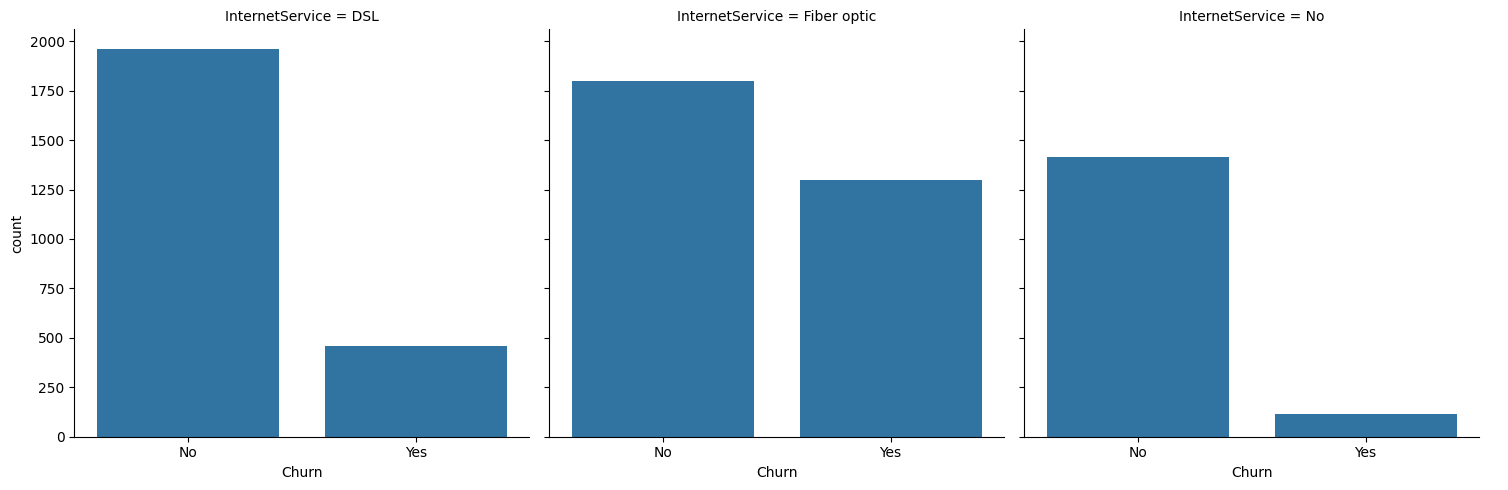

In [41]:
sns.catplot(x='Churn', col='InternetService', kind='count', data=df)

Here we observe that the customers who use Fiber Optic as internet service have high churn rate as compared to other internet service

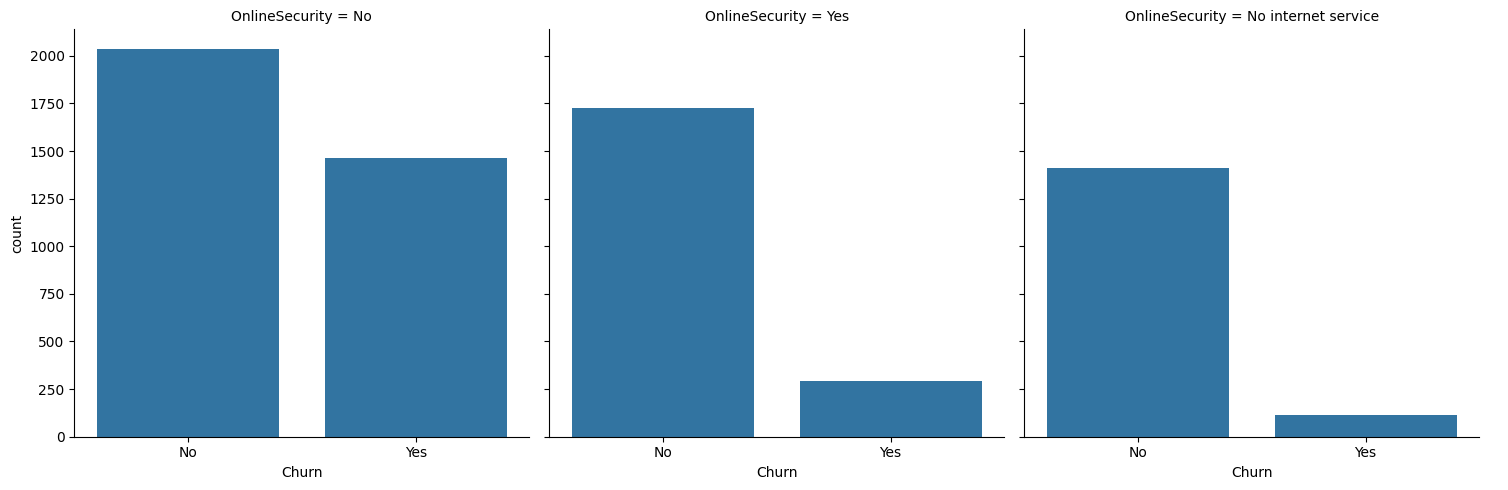

In [42]:
sns.catplot(x='Churn', col='OnlineSecurity', kind='count', data=df)

Here we observe that the customers whose don't have online security their churn rate is high.

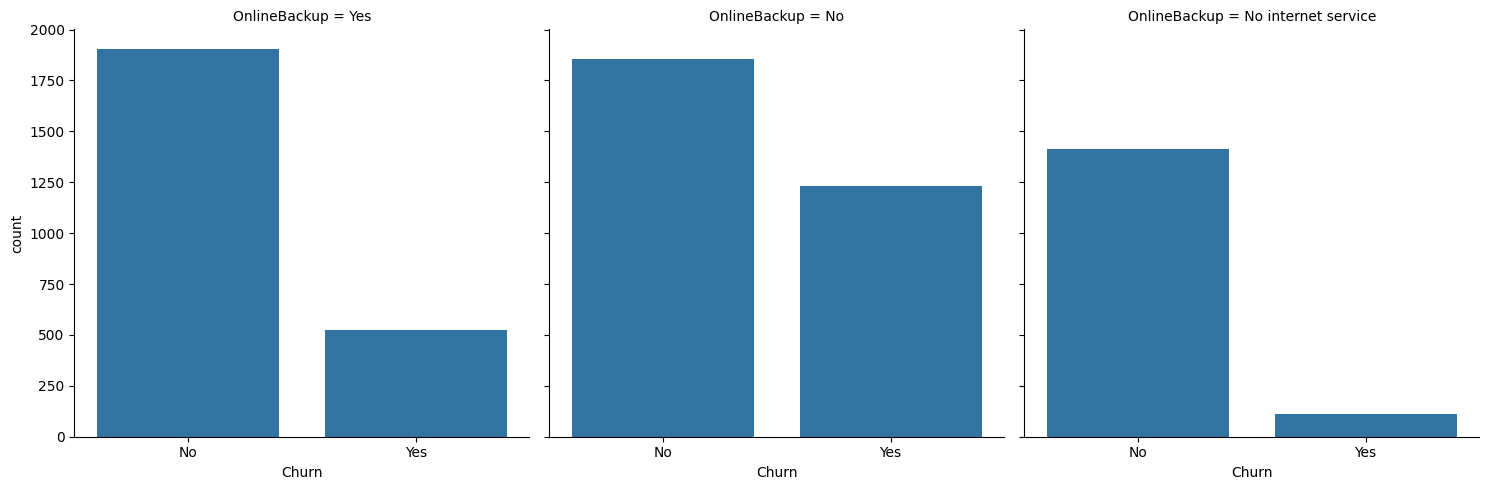

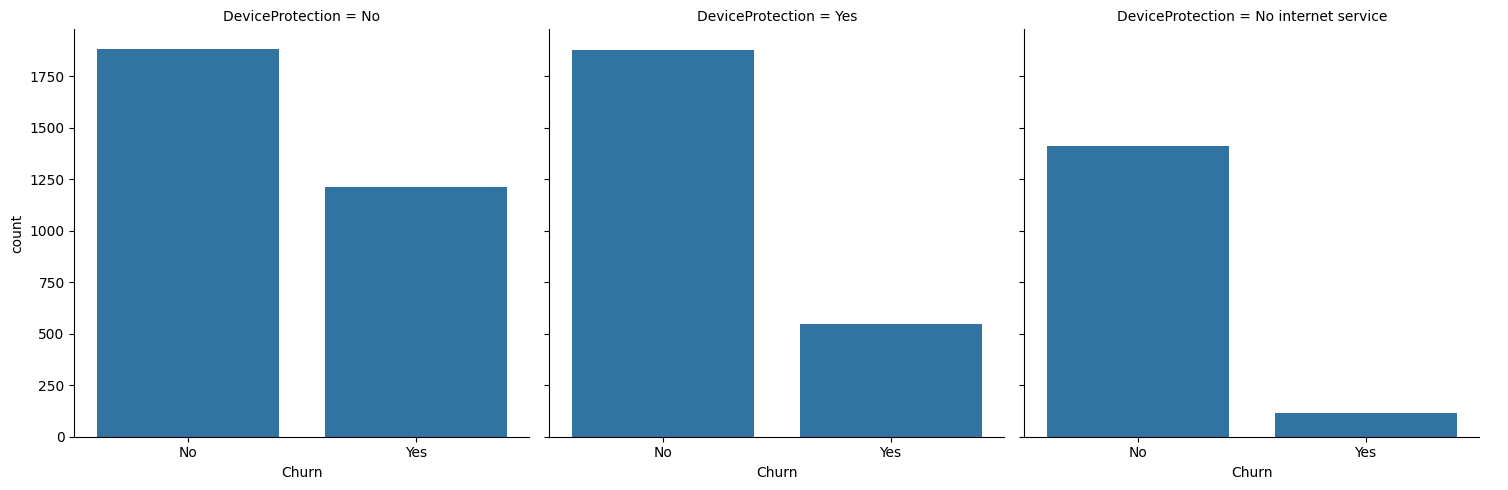

In [43]:
sns.catplot(x='Churn', col='OnlineBackup', kind='count', data=df)

sns.catplot(x='Churn', col='DeviceProtection', kind='count', data=df)

Here we observe that the customer whose don't have onlineBackup have high churn rate.

Here we observe that the customers whose don't have any device protection have high churn rate.

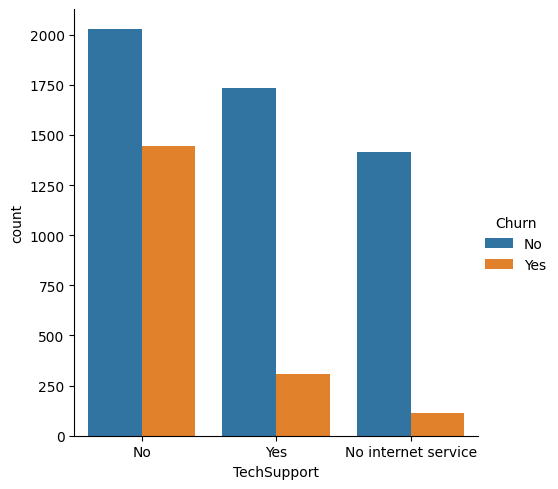

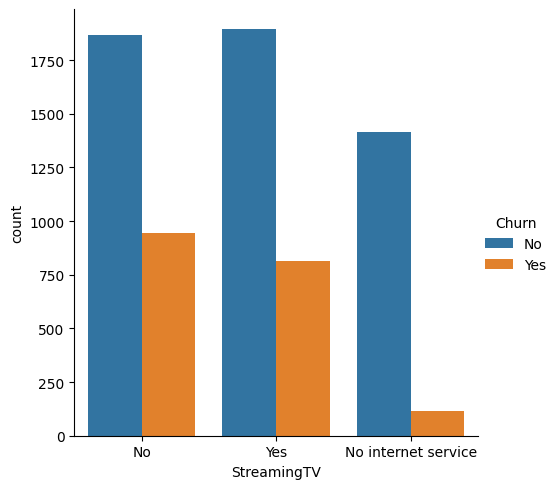

In [44]:
sns.catplot(x='TechSupport', hue='Churn', kind='count', data=df)

sns.catplot(x='StreamingTV', hue='Churn', kind='count', data=df)

Here we observe that the customers whose don't have any tech support have high churn compared to other.

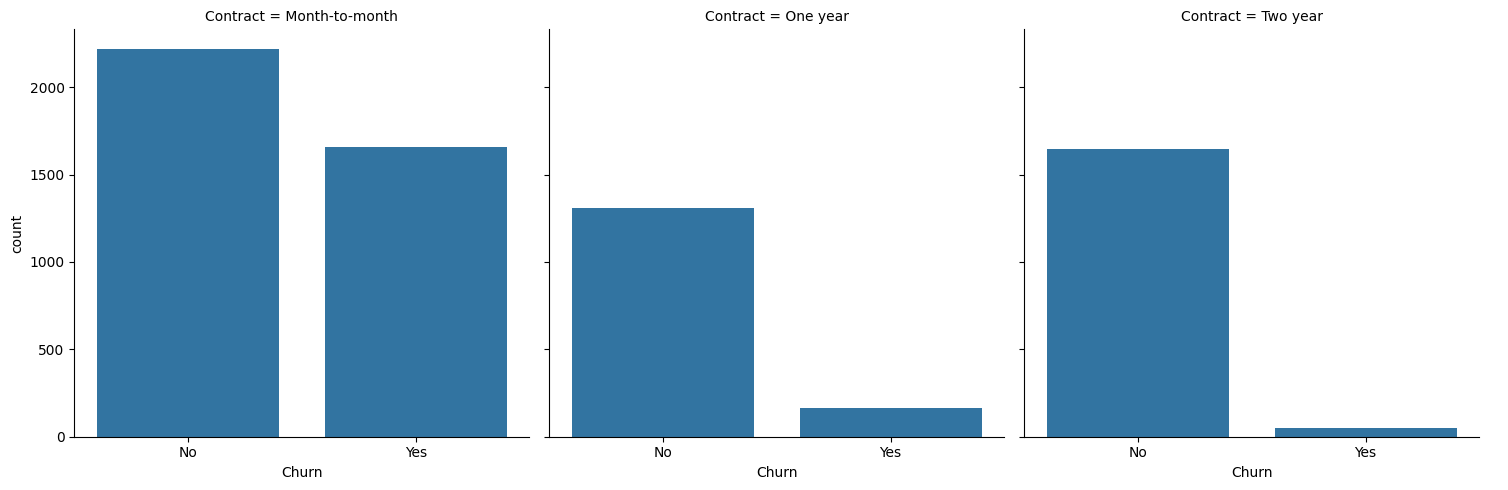

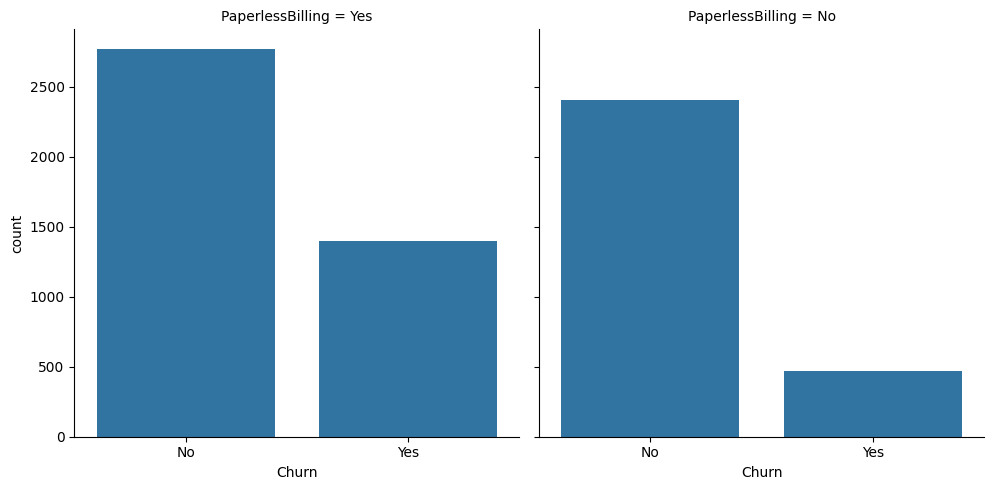

In [45]:
sns.catplot(x='Churn', col='Contract', kind='count', data=df)

sns.catplot(x='Churn', col='PaperlessBilling', kind='count', data=df)

Here we observe that the customers whose have monthly contract have high churn rate as compared to others contract type.

Here we observe that the customer whose have paperless billing system have high churn possibility as compared to other billing system.

<Figure size 1000x500 with 0 Axes>

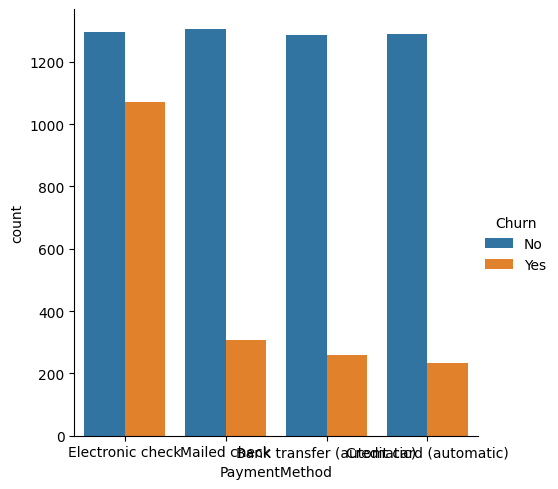

In [46]:
plt.figure(figsize=(10,5))
sns.catplot(x='PaymentMethod', hue='Churn', kind='count', data=df)

Here we observe that the customer who did payment by electronic check have high churn possibility.

# Multivariate Analysis

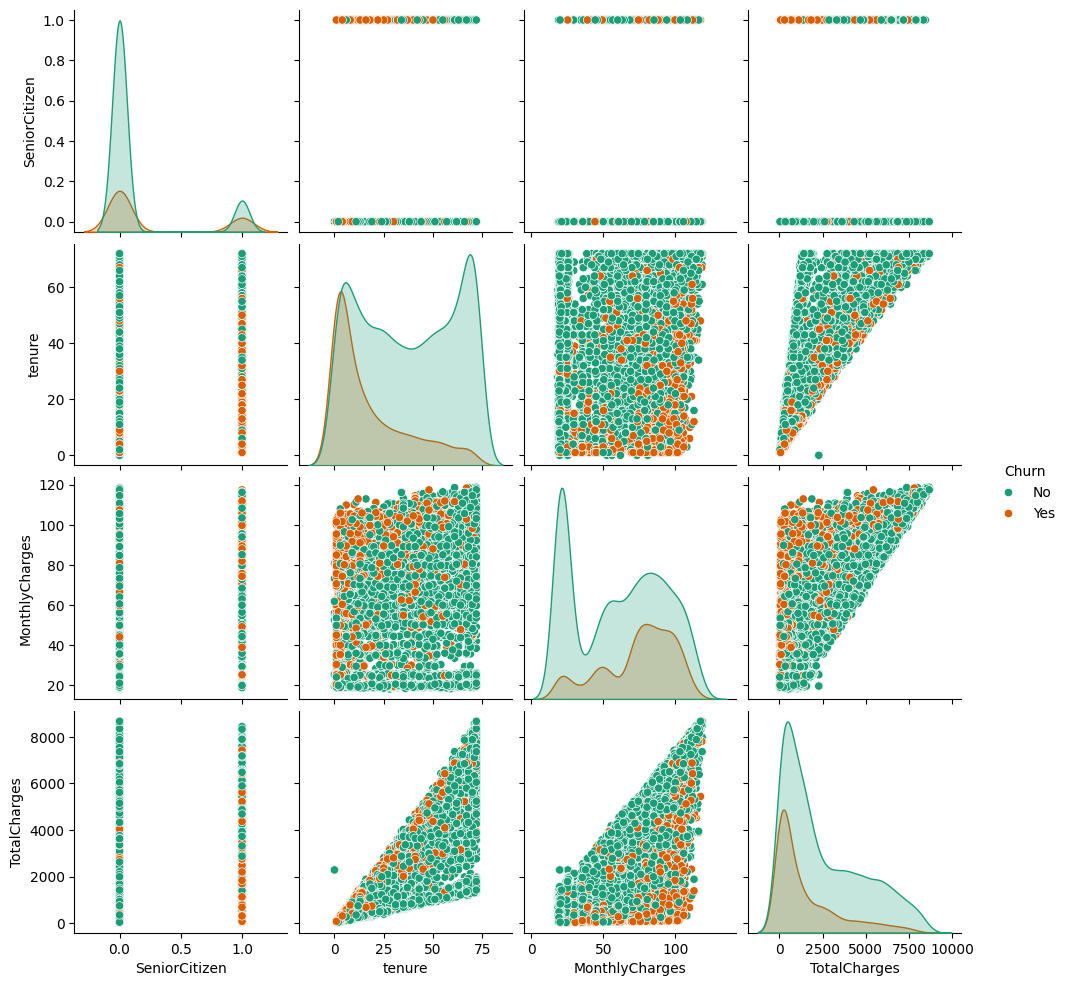

In [47]:
sns.pairplot(df, hue='Churn', palette='Dark2')

# check outlier

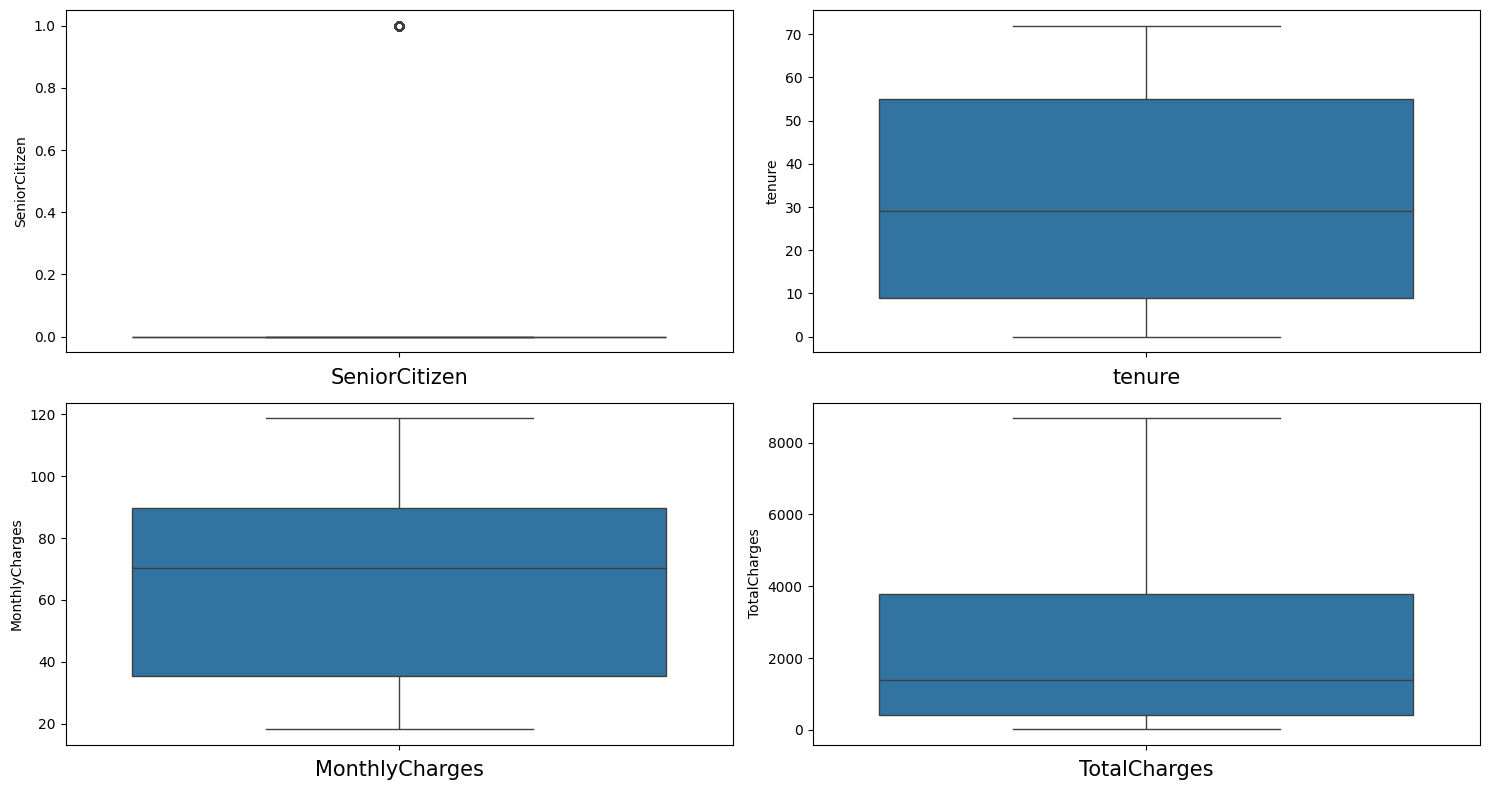

In [48]:
plt.figure(figsize=(15,8))
p =1
for col in numerical_col:
    if p <= 4:
        ax = plt.subplot(2,2,p)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
    p+=1
plt.tight_layout()    

Here we observe only SeniorCitizen column has outlier but this column hold categotical/discrete value.So no need to remove outlier.

# Check Skewness

In [49]:
# Encodeing the dataset

# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()

# for col in categoical_col:
#      df[col + '_e'] = encoder.fit_transform(df[col])
    
# df.drop(categorical_columns,axis=1, inplace=True)    
# df.head()   

In [50]:
# Encodeing the dataset

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
        
df.head()        

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


In [51]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

The columns SeniorCitizen,Dependents,Contracts and TotalCharges have skewness. So we remove skewness for continuous value using cuberoot. But for categorical value we no need to remove skewness.

In [52]:
# Remove skewness

df['TotalCharges'] = np.cbrt(df['TotalCharges'])

In [53]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.011168
Churn               1.063031
dtype: float64

<Axes: xlabel='TotalCharges', ylabel='Density'>

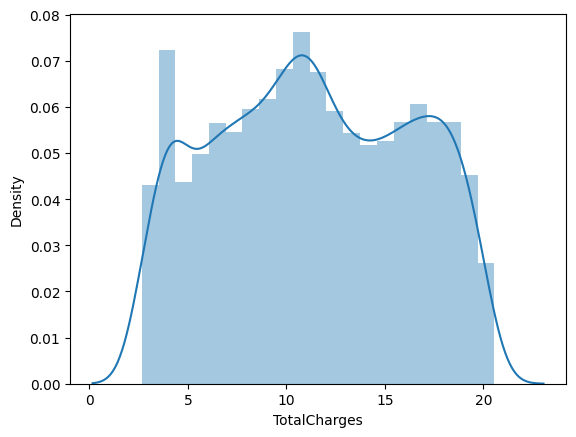

In [54]:
sns.distplot(df['TotalCharges'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7043.0,0.483033,0.499748,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7043.0,0.299588,0.458110,0.000000,0.000000,0.000000,1.000000,1.000000
tenure,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
PhoneService,7043.0,0.903166,0.295752,0.000000,1.000000,1.000000,1.000000,1.000000
MultipleLines,7043.0,0.940508,0.948554,0.000000,0.000000,1.000000,2.000000,2.000000
InternetService,7043.0,0.872923,0.737796,0.000000,0.000000,1.000000,1.000000,2.000000
OnlineSecurity,7043.0,0.790004,0.859848,0.000000,0.000000,1.000000,2.000000,2.000000
OnlineBackup,7043.0,0.906432,0.880162,0.000000,0.000000,1.000000,2.000000,2.000000


# Check Correlation

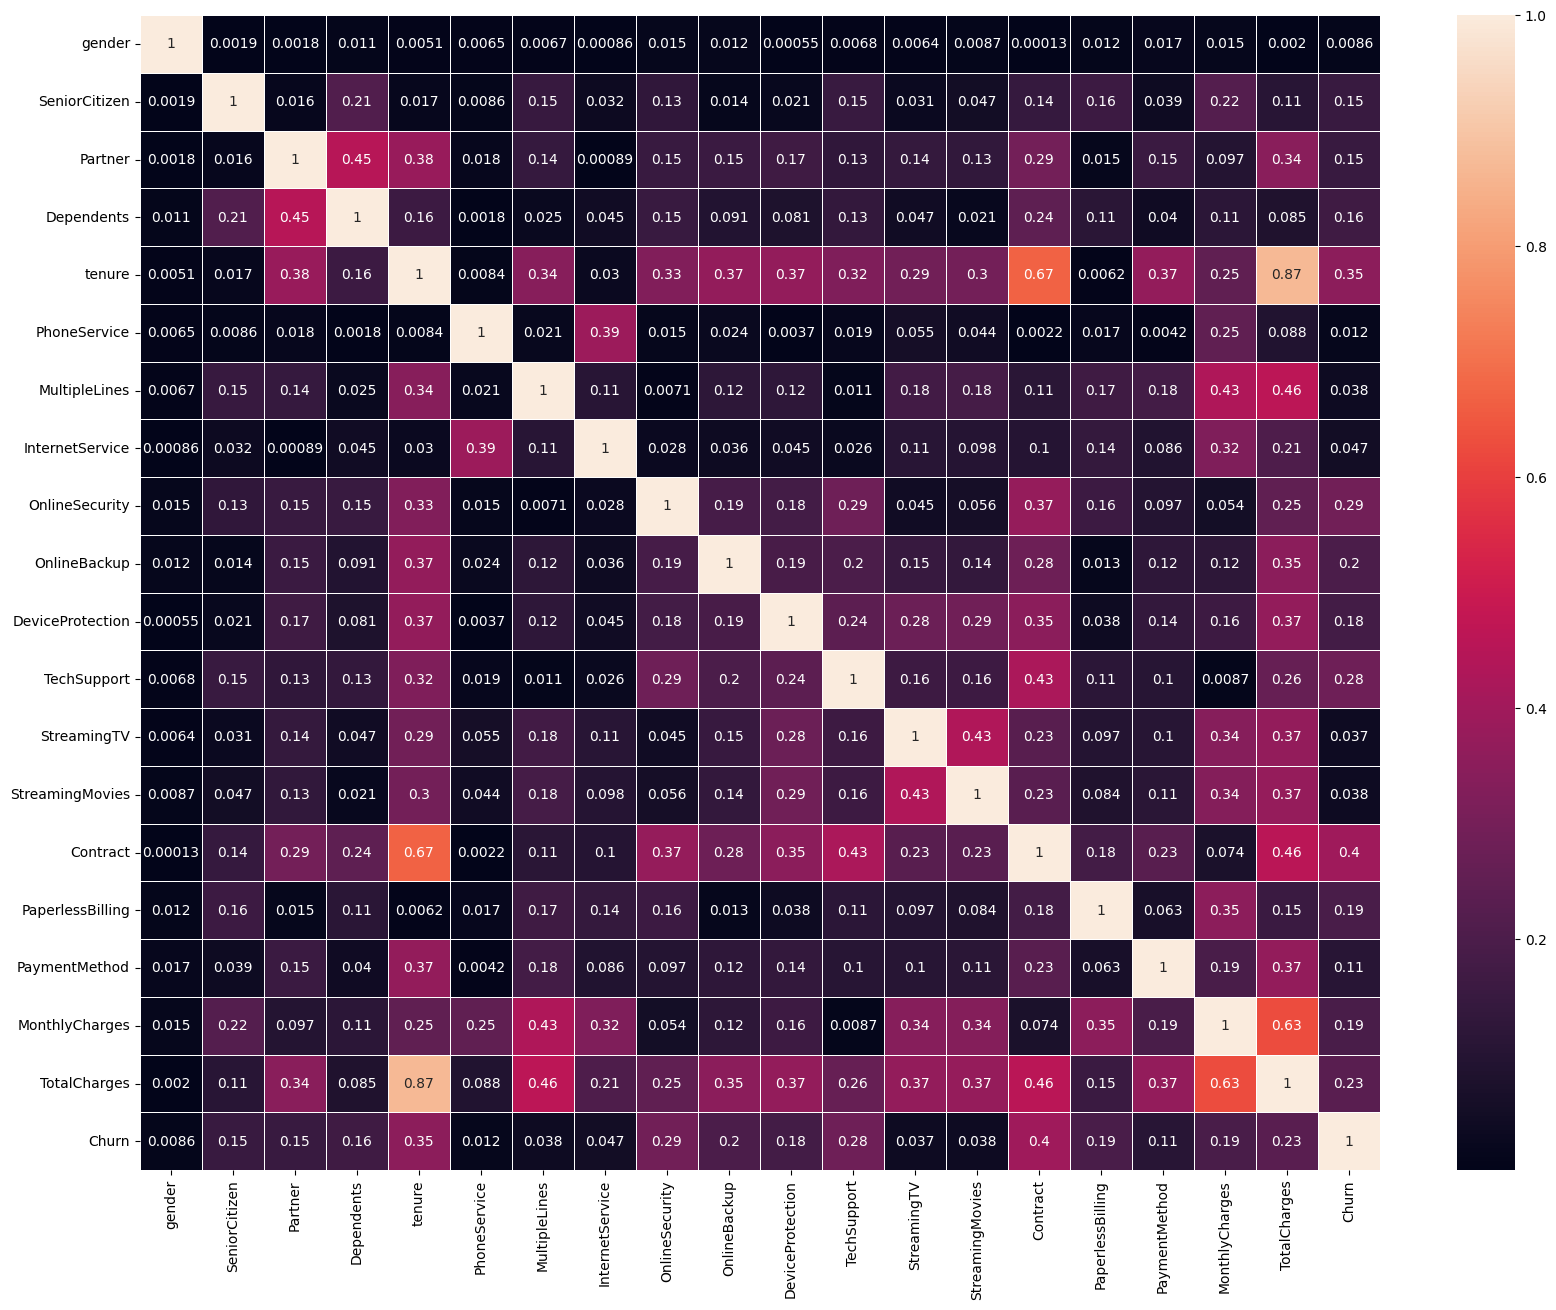

In [57]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, annot_kws= {'size': 10}, linewidths= 0.4, linecolor='white')
plt.show()

In [58]:
df_corr['Churn'].sort_values(ascending = False)

Churn               1.000000
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
TotalCharges        0.233781
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
InternetService     0.047291
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64

In [129]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [130]:
X.shape

(7043, 19)

# feature scaling

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
x_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


In [132]:
x_scaled.shape

(7043, 19)

We have scales the data using Standard Scaler method to avoid the biasness.

# Checking Variance Inflation Factor(VIF)

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_scaled.columns
vif['VIF values'] = [variance_inflation_factor(x_scaled.values, i) for i in range(len(x_scaled.columns))]

In [134]:
vif

,Features,VIF values
0,gender,1.001696
1,SeniorCitizen,1.149704
2,Partner,1.462974
3,Dependents,1.383950
4,tenure,12.357252
5,PhoneService,1.622391
6,MultipleLines,1.398354
7,InternetService,1.870013
8,OnlineSecurity,1.256219
9,OnlineBackup,1.192694


By checking the VIF valueswe can find the features causing multicoliniearity problem.Here we can find the features TotalCharges and Tenure have VIF value is greater than 10 which means they have highly correlated with other independent features.So we will drop one of them first.

In [135]:
x_scaled.drop('TotalCharges', axis=1, inplace=True)

In [136]:
vif = pd.DataFrame()
vif['Features'] = x_scaled.columns
vif['VIF values'] = [variance_inflation_factor(x_scaled.values, i) for i in range(len(x_scaled.columns))]

In [137]:
vif

,Features,VIF values
0,gender,1.001684
1,SeniorCitizen,1.149639
2,Partner,1.460856
3,Dependents,1.382106
4,tenure,2.754468
5,PhoneService,1.622282
6,MultipleLines,1.391652
7,InternetService,1.825876
8,OnlineSecurity,1.247696
9,OnlineBackup,1.185932


So, we have solve the multicoliniearity problem

In [138]:
y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Here we can see the data is not balanced.Now we apply Oversampling method to balance the dataset.

# OverSampling

In [141]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x,y)

In [142]:
y1.value_counts()

Churn
0.0    5174
1.0    5174
Name: count, dtype: int64

Now the data is balanced. Now build machine learning modelling

In [143]:
# -import important libreries
# -do non graphical analysis like data cleaning, handle missing data etc.
# -Univariate analysis
# -Bivariate analysis
# -Multivariate analysis
# -encode the categorical value
# -check outliers and remove it if presents
# -check skewness and remove it if presents
# -check multicolinearity and remove it if presents(VIF method)
# -apply feature scaling method on numerical features
# -apply resampling method if target variable is imbalanced(in classification problem)
# -also apply feature selection method if needed

# Machine Learning Modelling

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train,y_train)
    y_pred = rfc.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is', maxAccu, 'at random state', maxRS)        

Best Accuracy is 0.8673107890499195 at random state 40


In [145]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=maxRS)

# Classification Algorithm

In [147]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score

RandomForest

In [157]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y1_pred = rfc.predict(x_test)
print('Accuracy',accuracy_score(y_test,y1_pred))
print(confusion_matrix(y_test,y1_pred))
# sns.heatmap(confusion_matrix(y_test,y1_pred),annot=True)
print('Classification Report', classification_report(y_test,y1_pred))

Accuracy 0.8673107890499195
[[1289  219]
 [ 193 1404]]
Classification Report               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1508
         1.0       0.87      0.88      0.87      1597

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



model accuracy is 86.73

ExtraTreesClassifier

In [159]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
y2_pred = etc.predict(x_test)
print('Accuracy',accuracy_score(y_test,y2_pred))
print(confusion_matrix(y_test,y2_pred))
print('Classification Report', classification_report(y_test,y2_pred))

Accuracy 0.8663446054750402
[[1287  221]
 [ 194 1403]]
Classification Report               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1508
         1.0       0.86      0.88      0.87      1597

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



model accuracy is 86.63

LogisticRegression

In [160]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print('Classification Report', classification_report(y_test,lr_pred))

Accuracy 0.7780998389694042
[[1120  388]
 [ 301 1296]]
Classification Report               precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      1508
         1.0       0.77      0.81      0.79      1597

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



model accuracy is 77.80

GradientBoostingClassifier

In [161]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
print('Accuracy',accuracy_score(y_test,gbc_pred))
print(confusion_matrix(y_test,gbc_pred))
print('Classification Report', classification_report(y_test,gbc_pred))

Accuracy 0.8476650563607085
[[1234  274]
 [ 199 1398]]
Classification Report               precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1508
         1.0       0.84      0.88      0.86      1597

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



model accuracy is 84.76

AdaBoostClassifier

In [162]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_test)
print('Accuracy',accuracy_score(y_test,abc_pred))
print(confusion_matrix(y_test,abc_pred))
print('Classification Report', classification_report(y_test,abc_pred))

Accuracy 0.8173913043478261
[[1172  336]
 [ 231 1366]]
Classification Report               precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      1508
         1.0       0.80      0.86      0.83      1597

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



model accuracy is 81.73

BaggingClassifier

In [163]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
bc_pred = bc.predict(x_test)
print('Accuracy',accuracy_score(y_test,bc_pred))
print(confusion_matrix(y_test,bc_pred))
print('Classification Report', classification_report(y_test,bc_pred))

Accuracy 0.8383252818035427
[[1292  216]
 [ 286 1311]]
Classification Report               precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1508
         1.0       0.86      0.82      0.84      1597

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



model accuracy is 83.83

# Check cross_val_score

In [164]:
# RandomForestClassifier
score = cross_val_score(rfc,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score : ',accuracy_score(y_test,y1_pred) - score.mean())

[0.77149758 0.79130435 0.88937198 0.89608507 0.91058482]
0.8517687603757329
Difference between accuracy score and cross validation score :  0.015542028674186636


In [165]:
# ExtraTreesClassifier
score = cross_val_score(etc,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score : ',accuracy_score(y_test,y2_pred) - score.mean())

[0.80772947 0.80821256 0.89855072 0.90333494 0.90430159]
0.8644258586028398
Difference between accuracy score and cross validation score :  0.0019187468722003942


In [166]:
# GradientBoostingClassifier
score = cross_val_score(gbc,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score : ',accuracy_score(y_test,gbc_pred) - score.mean())

[0.74879227 0.78309179 0.85797101 0.88351861 0.87820203]
0.830315142090627
Difference between accuracy score and cross validation score :  0.01734991427008159


In [167]:
# AdaBoostClassifier
score = cross_val_score(abc,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score : ',accuracy_score(y_test,abc_pred) - score.mean())

[0.76280193 0.77246377 0.8294686  0.83518608 0.84388594]
0.8087612629966635
Difference between accuracy score and cross validation score :  0.008630041351162632


In [168]:
# LogisticRegression
score = cross_val_score(lr,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score : ',accuracy_score(y_test,lr_pred) - score.mean())

[0.76956522 0.76086957 0.76521739 0.7742871  0.77960367]
0.7699085884800471
Difference between accuracy score and cross validation score :  0.008191250489357094


In [169]:
# BaggingClassifier
score = cross_val_score(bc,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score : ',accuracy_score(y_test,bc_pred) - score.mean())

[0.73719807 0.76038647 0.86231884 0.88786854 0.88013533]
0.8255814496489471
Difference between accuracy score and cross validation score :  0.012743832154595625


In [170]:
min(0.015542028674186636, 0.0019187468722003942,0.01734991427008159,0.008630041351162632, 0.008191250489357094,0.012743832154595625)

0.0019187468722003942

ExtraTree Clasifier is our best model as the difference between accuracy_score and cross validation score is least.

# ExtraTreesClassifier is our Best Model

Hyper parameter tuning

In [172]:
# ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion' :['gini','entropy'],
    'random_state' : [10,50,1000],
    'max_depth' : [0,10,20],
    'n_jobs' : [-2,-1,1],
    'n_estimators' : [50,100,200,300]
}

In [173]:
gcv = GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [174]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [175]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [177]:
final_model = ExtraTreesClassifier(criterion = 'gini', max_depth= 20, n_estimators= 300, n_jobs= -2, random_state= 50)
final_model.fit(x_train,y_train)
f_pred = final_model.predict(x_test)
acc = accuracy_score(y_test,f_pred)
print(acc*100)

86.89210950080515


The model accuracy is appro. 87%

# Save the model

In [178]:
import joblib

In [179]:
joblib.dump(final_model,'Telco_Customer_Churn_Analysis.pkl')

['Telco_Customer_Churn_Analysis.pkl']

# Predicting from saved model

In [180]:
model = joblib.load('Telco_Customer_Churn_Analysis.pkl')

# prediction
prediction = model.predict(x_test)
prediction

array([0., 1., 1., ..., 1., 0., 1.])

These are the predicted churn value of customers

In [181]:
a = np.array(y_test)
df=pd.DataFrame({
    'Actual': a,
    'Prediction': prediction
})

df

,Actual,Prediction
0,0.0,0.0
1,0.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,1.0
...,...,...
3100,1.0,1.0
3101,1.0,1.0
3102,1.0,1.0
3103,0.0,0.0
